<a href="https://colab.research.google.com/github/automate2simplify/public_repo/blob/main/phillip_dataproject01_dwd_fall2023_vFinal_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phillip Kim**

DWD Final Project

## Questions
### (1) What preliminary questions do you have of the data?
### (2) What % of LinkedIn job postings have compensation details?
### (3) Stats on compensation ranges / details (example: avg, med, range, mode)?
### (4) Stats by industry?
### (5) Which industries post the most jobs on LinkedIn?

### LinkedIn Job Postings

##### 1) What is the data? Where is it from? Provide a URL https://www.kaggle.com/datasets/arshkon/linkedin-job-postings

##### Source: LinkedIn job data

##### 2) Is it a topic that interests you?

##### Yes, I’d like to see if there are interesting patterns that we can glean from LinkedIn job postings – preferences for industries, functions, etc

##### 3) What preliminary questions do you have of the data?

##### See below

##### 4) What is interesting about the data?

##### It contains fields for compensation – it would be interesting to see how many roles are posted with compensation details

##### 5) What do you think will interest others about these data?

##### Many of us are searching for FT roles and utilize LinkedIn as a resource

##### 6) What technologies, platforms, or skills will you have to learn or brush up on?
Initially, I thought I could find interesting patterns without additional learning. In the end, I had to learn how to plot a box-and-whisker chart using matplotlib.

# Library imports

In [ ]:
!pip install kaggle --quiet

#replace with your username and key
%env KAGGLE_USERNAME=phillipkim2024
%env KAGGLE_KEY=97c8f701adb806412cc4d3dfc57fe0d7

env: KAGGLE_USERNAME=phillipkim2024
env: KAGGLE_KEY=97c8f701adb806412cc4d3dfc57fe0d7


In [ ]:
!kaggle datasets download -d arshkon/linkedin-job-postings

 71% 32.0M/44.9M [00:00<00:00, 122MB/s] 
100% 44.9M/44.9M [00:00<00:00, 122MB/s]


In [ ]:
!unzip /content/linkedin-job-postings.zip

Archive:  /content/linkedin-job-postings.zip
  inflating: company_details/companies.csv  
  inflating: company_details/company_industries.csv  
  inflating: company_details/company_specialities.csv  
  inflating: company_details/employee_counts.csv  
  inflating: job_details/benefits.csv  
  inflating: job_details/job_industries.csv  
  inflating: job_details/job_skills.csv  
  inflating: job_details/salaries.csv  
  inflating: job_postings.csv        
  inflating: maps/industries.csv     
  inflating: maps/skills.csv         


In [ ]:
# Import the unzipped .csv files to dataframes using pandas
import pandas as pd
df_company_companies = pd.read_csv("company_details/companies.csv", header=0)
df_company_industries = pd.read_csv("company_details/company_industries.csv", header=0)
df_company_specialties = pd.read_csv("company_details/company_specialities.csv", header=0)
df_company_employee_counts = pd.read_csv("company_details/employee_counts.csv", header=0)
df_job_benefits = pd.read_csv("job_details/benefits.csv", header=0)
df_job_industries = pd.read_csv("job_details/job_industries.csv", header=0)
df_job_skills = pd.read_csv("job_details/salaries.csv", header=0)
df_job_salaries = pd.read_csv("job_details/salaries.csv", header=0)
df_job_postings = pd.read_csv("job_postings.csv", header=0)
df_maps_industries = pd.read_csv("maps/industries.csv", header=0)
df_maps_skills = pd.read_csv("maps/skills.csv", header=0)

In [ ]:
df_job_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13352 entries, 0 to 13351
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   salary_id          13352 non-null  int64  
 1   job_id             13352 non-null  int64  
 2   max_salary         11111 non-null  float64
 3   med_salary         2241 non-null   float64
 4   min_salary         11111 non-null  float64
 5   pay_period         13352 non-null  object 
 6   currency           13352 non-null  object 
 7   compensation_type  13352 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 834.6+ KB


# Data pre-processing

In [ ]:
# Concatenate into one DF
# Create a dictionary with dataframe names as keys and dataframes as values
dataframes_dict = {
    'df_company_companies': df_company_companies,
    'df_company_industries': df_company_industries,
    'df_company_specialties': df_company_specialties,
    'df_company_employee_counts': df_company_employee_counts,
    'df_job_benefits': df_job_benefits,
    'df_job_industries': df_job_industries,
    'df_job_skills': df_job_skills,
    'df_job_salaries': df_job_salaries,
    'df_job_postings': df_job_postings,
    'df_maps_industries': df_maps_industries,
    'df_maps_skills': df_maps_skills
}

In [ ]:
# Count the number of NaNs for each dataframe
nan_counts = {key: df.isna().sum().sum() for key, df in dataframes_dict.items()}

# Count the number of NaNs for each dataframe
nan_counts = {key: df.isna().sum().sum() for key, df in dataframes_dict.items()}

# Find the maximum length of dataframe names for alignment
max_length = max(len(key) for key in nan_counts.keys())

# Find the maximum count length for alignment
max_count_length = max(len(f"{count} NaN values") for count in nan_counts.values())

# Print the desired format with minimized spaces
for key, count in nan_counts.items():
    padding_key = ' ' * (max_length - len(key))
    count_str = f"{count} NaN values"
    padding_count = ' ' * (max_count_length - len(count_str))
    print(f"{key}:{padding_key} {padding_count}{count_str}")

df_company_companies:         1281 NaN values
df_company_industries:           0 NaN values
df_company_specialties:          0 NaN values
df_company_employee_counts:      0 NaN values
df_job_benefits:                 0 NaN values
df_job_industries:               0 NaN values
df_job_skills:               15593 NaN values
df_job_salaries:             15593 NaN values
df_job_postings:            288396 NaN values
df_maps_industries:             17 NaN values
df_maps_skills:                  0 NaN values


In [ ]:
dataframes_dict['df_company_companies'].isna().sum()

company_id         0
name               1
description      143
company_size    1105
state              8
country            0
city               1
zip_code          12
address           11
url                0
dtype: int64

### Show all dataframes and their columns (hidden)

In [ ]:
from pprint import pprint

# Assuming dataframes_dict is defined
for df_name, dataframe in dataframes_dict.items():
    print(f"{df_name}:")
    pprint(list(dataframe.columns))
    print()

df_company_companies:
['company_id',
 'name',
 'description',
 'company_size',
 'state',
 'country',
 'city',
 'zip_code',
 'address',
 'url']

df_company_industries:
['company_id', 'industry']

df_company_specialties:
['company_id', 'speciality']

df_company_employee_counts:
['company_id', 'employee_count', 'follower_count', 'time_recorded']

df_job_benefits:
['job_id', 'inferred', 'type']

df_job_industries:
['job_id', 'industry_id']

df_job_skills:
['salary_id',
 'job_id',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'currency',
 'compensation_type']

df_job_salaries:
['salary_id',
 'job_id',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'currency',
 'compensation_type']

df_job_postings:
['job_id',
 'company_id',
 'title',
 'description',
 'max_salary',
 'med_salary',
 'min_salary',
 'pay_period',
 'formatted_work_type',
 'location',
 'applies',
 'original_listed_time',
 'remote_allowed',
 'views',
 'job_posting_url',
 'application_url',
 'application

# Data analysis (that includes the 5 questions)
### I do pre-processing and analysis for each visualization I produce (this way I can reuse variables locally)

# A Summary of the Key Findings

### Question 1
##### Are there more job postings for smaller or larger companies?
##### Answer: Smaller companies post more jobs; this might be due to the number of smaller companies vastly outnumbering larger companies and/or smaller companies having higher turnover. But this cannot be determined from this dataset alone.

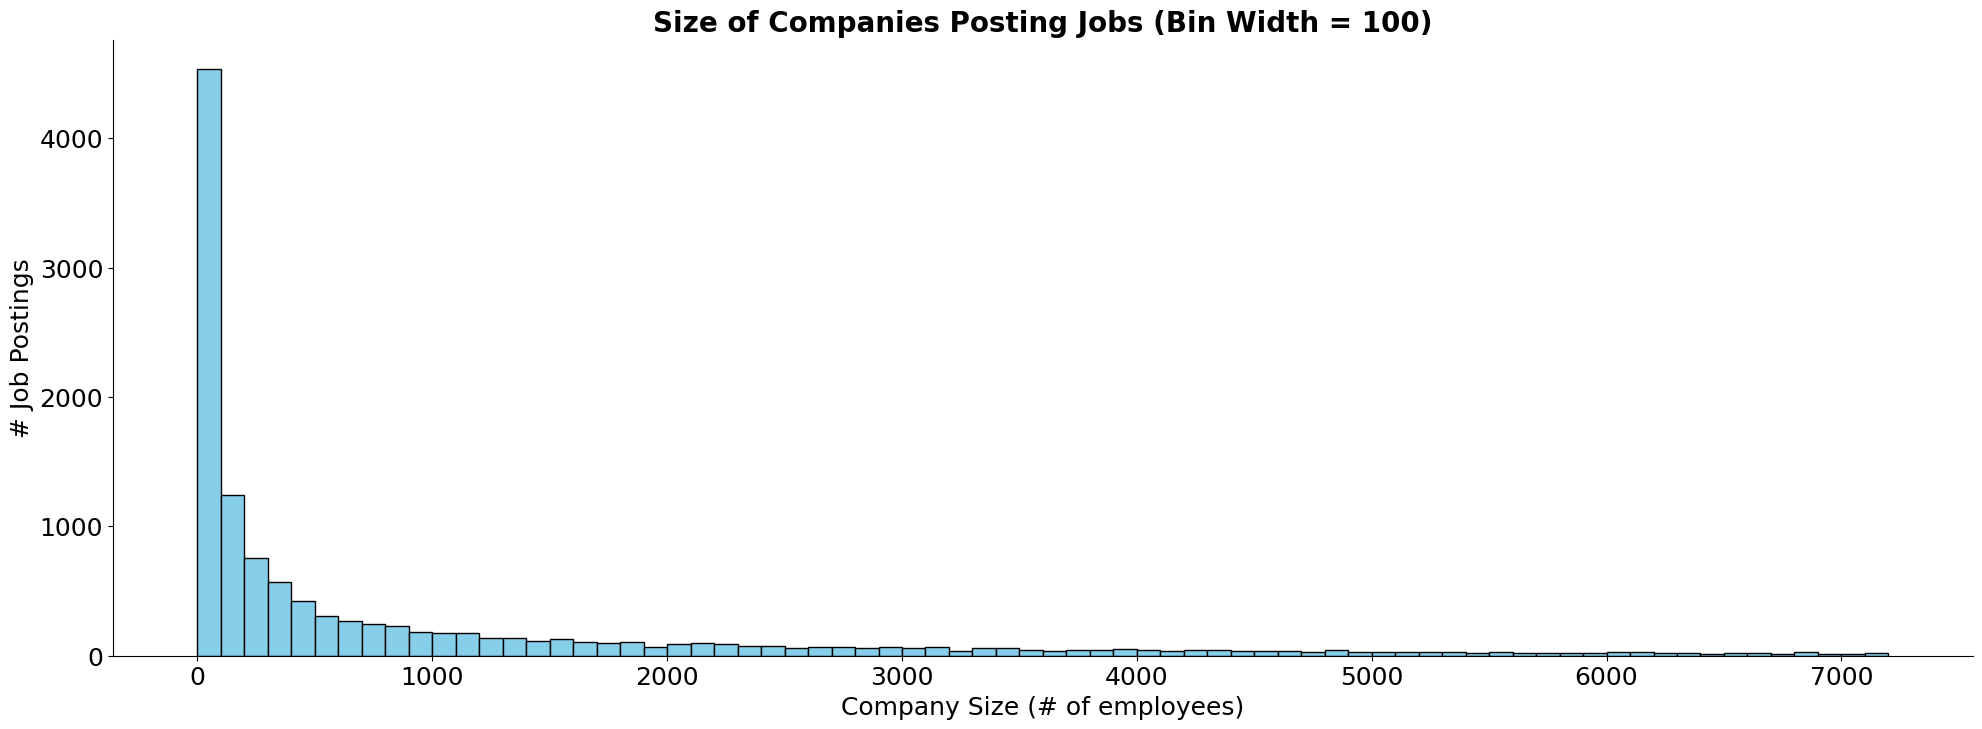

In [ ]:
import matplotlib.pyplot as plt

df = dataframes_dict['df_company_employee_counts']

# Rename Columns
df.columns = df.columns.str.replace('_', ' ').str.title()

# Calculate IQR and set outlier threshold
Q1 = df['Employee Count'].quantile(0.25)
Q3 = df['Employee Count'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[df['Employee Count'] <= outlier_threshold]

# Specify bin width (1000 employees)
bin_width = 100
bin_edges = range(0, int(df_cleaned['Employee Count'].max()) + bin_width, bin_width)

# Increase the figure size
plt.figure(figsize=(24, 8))

# Plot a histogram of 'employee_count' without outliers with specified bin width
plt.hist(df_cleaned['Employee Count'], bins=bin_edges, color='skyblue', edgecolor='black')

# Add labels and title with adjusted font sizes
plt.xlabel('Company Size (# of employees)', fontsize=18)
plt.ylabel('# Job Postings', fontsize=18)
plt.title('Size of Companies Posting Jobs (Bin Width = 100)', fontsize=20, fontweight='bold')

# Set font size for axes values
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Remove chart borders except for axes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Show the plot
plt.show()

### Question 2
##### Which industries are hiring the most?
##### Answer: Interestingly, the most common job postings are to fill other jobs!

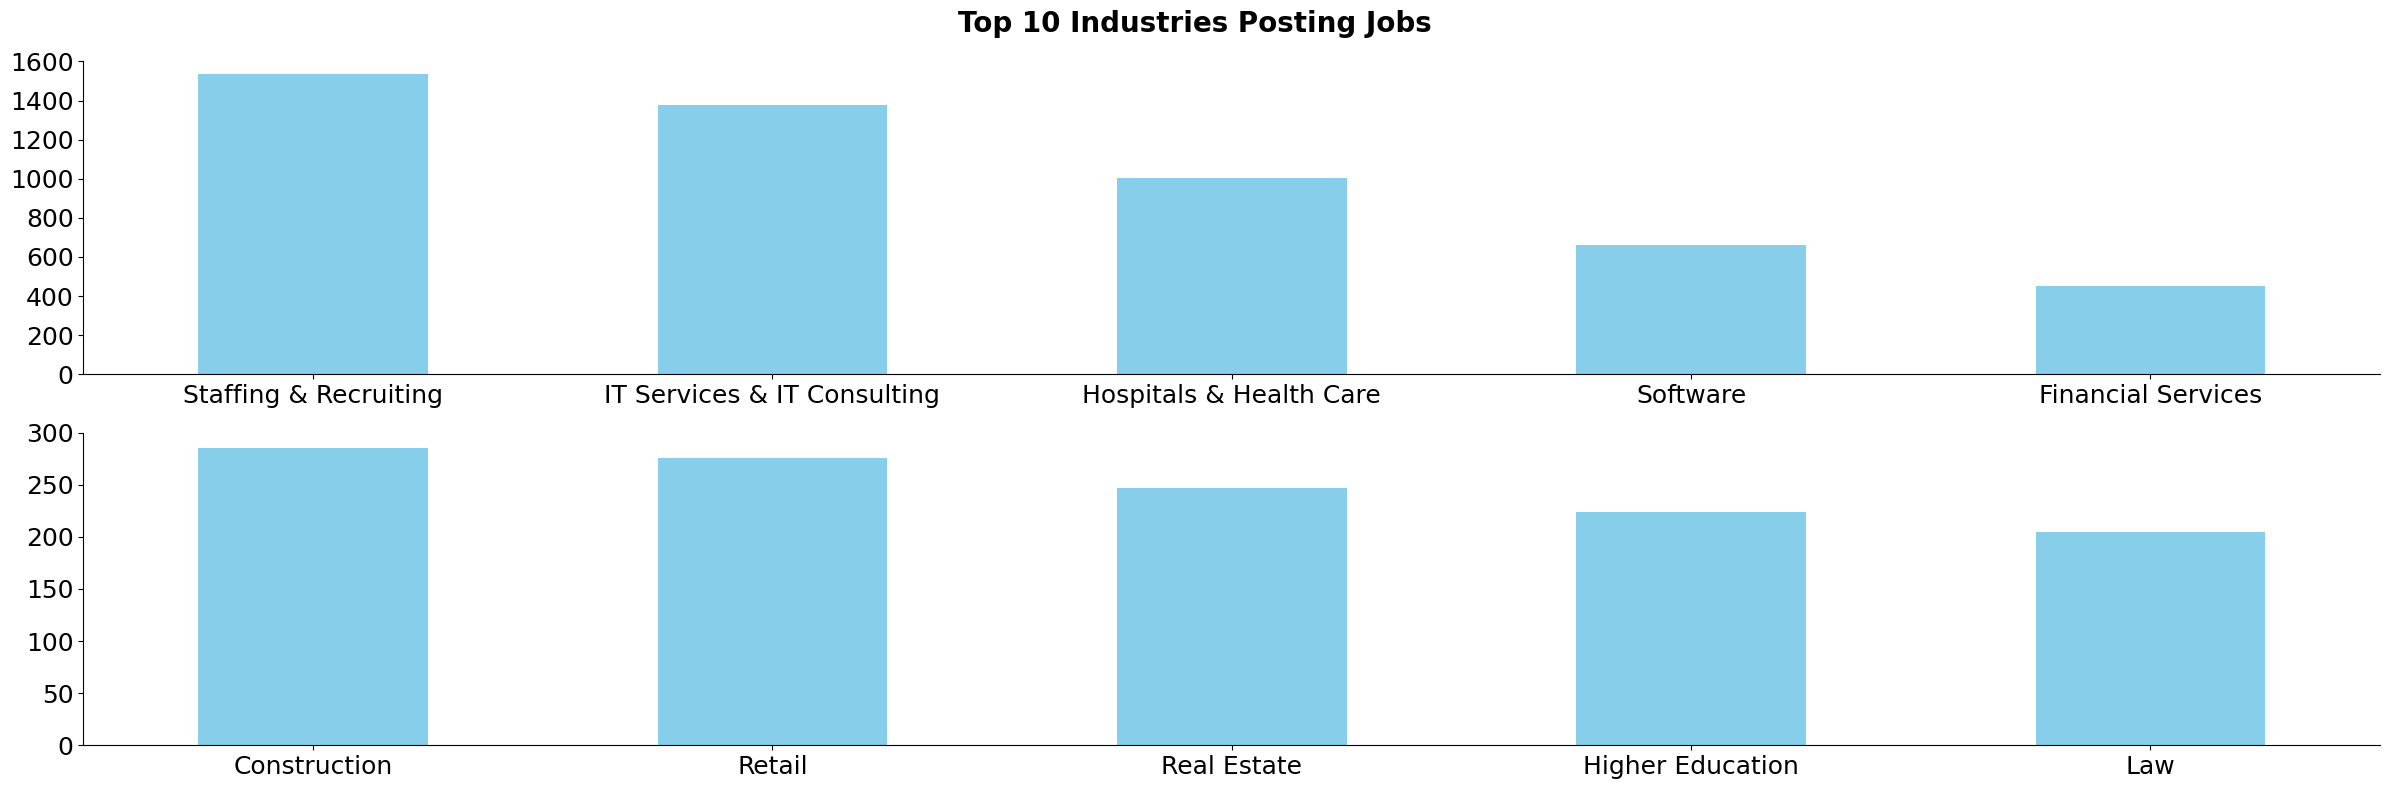

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_company_industries is your original dataframe
df = dataframes_dict['df_company_industries']

# Rename Columns
df.columns = df.columns.str.replace('_', ' ').str.title()

# Define a mapping of similar industries
industry_mapping = {
    'Staffing & Recruiting': 'Staffing & Recruiting',
    'Staffing and Recruiting': 'Staffing & Recruiting',
    'Information Technology & Services': 'IT Services & IT Consulting',
    'IT Services and IT Consulting': 'IT Services & IT Consulting',
    'Hospitals and Health Care': 'Hospitals & Health Care',
    'Hospital & Health Care': 'Hospitals & Health Care',
    'Software Development': 'Software',
    'Software': 'Software',
    'Computer Software': 'Software',
    'Law Practice': 'Law'
    # Add more mappings as needed
}

# Apply the mapping to create a new 'ProcessedIndustry' column
df['ProcessedIndustry'] = df['Industry'].map(industry_mapping).fillna(df['Industry'])

# Get the top n most common processed industries
bottom_processed = df['ProcessedIndustry'].value_counts().nlargest(10)

# Split the processed industries into two groups (top and bottom)
processed_top = bottom_processed.iloc[:5]
processed_bottom = bottom_processed.iloc[5:]

# Increase the figure size
plt.figure(figsize=(24, 8))  # Adjust the height to accommodate both plots

# Plot the top-level five processed industries
plt.subplot(2, 1, 1)
bar_plot_top = processed_top.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Set y-axis limit for the top chart
plt.gcf().axes[0].set_ylim(0, 1600)

# Plot the bottom-level five processed industries
plt.subplot(2, 1, 2)
bar_plot_bottom = processed_bottom.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Add a single title for the entire figure with adjusted font size, bold, and centered
plt.suptitle('Top 10 Industries Posting Jobs', fontsize=20, fontweight='bold')

# Adjust x-axis tick label font size
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', labelsize=18)  # You can adjust the font size as needed

# Set y-axis label and tick font size for both top and bottom plots
plt.gcf().axes[0].set_yticks(plt.gcf().axes[0].get_yticks())
plt.gcf().axes[1].set_yticks(plt.gcf().axes[1].get_yticks())
plt.gcf().axes[0].set_yticklabels(plt.gcf().axes[0].get_yticklabels(), size=18)
plt.gcf().axes[1].set_yticklabels(plt.gcf().axes[1].get_yticklabels(), size=18)

# Remove chart borders
for ax in plt.gcf().axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


### Question 3
##### Which industries are hiring the least?
##### Answer: This lens might suffer from data integrity (these industries only posted 1 job - this seems highly unlikedly

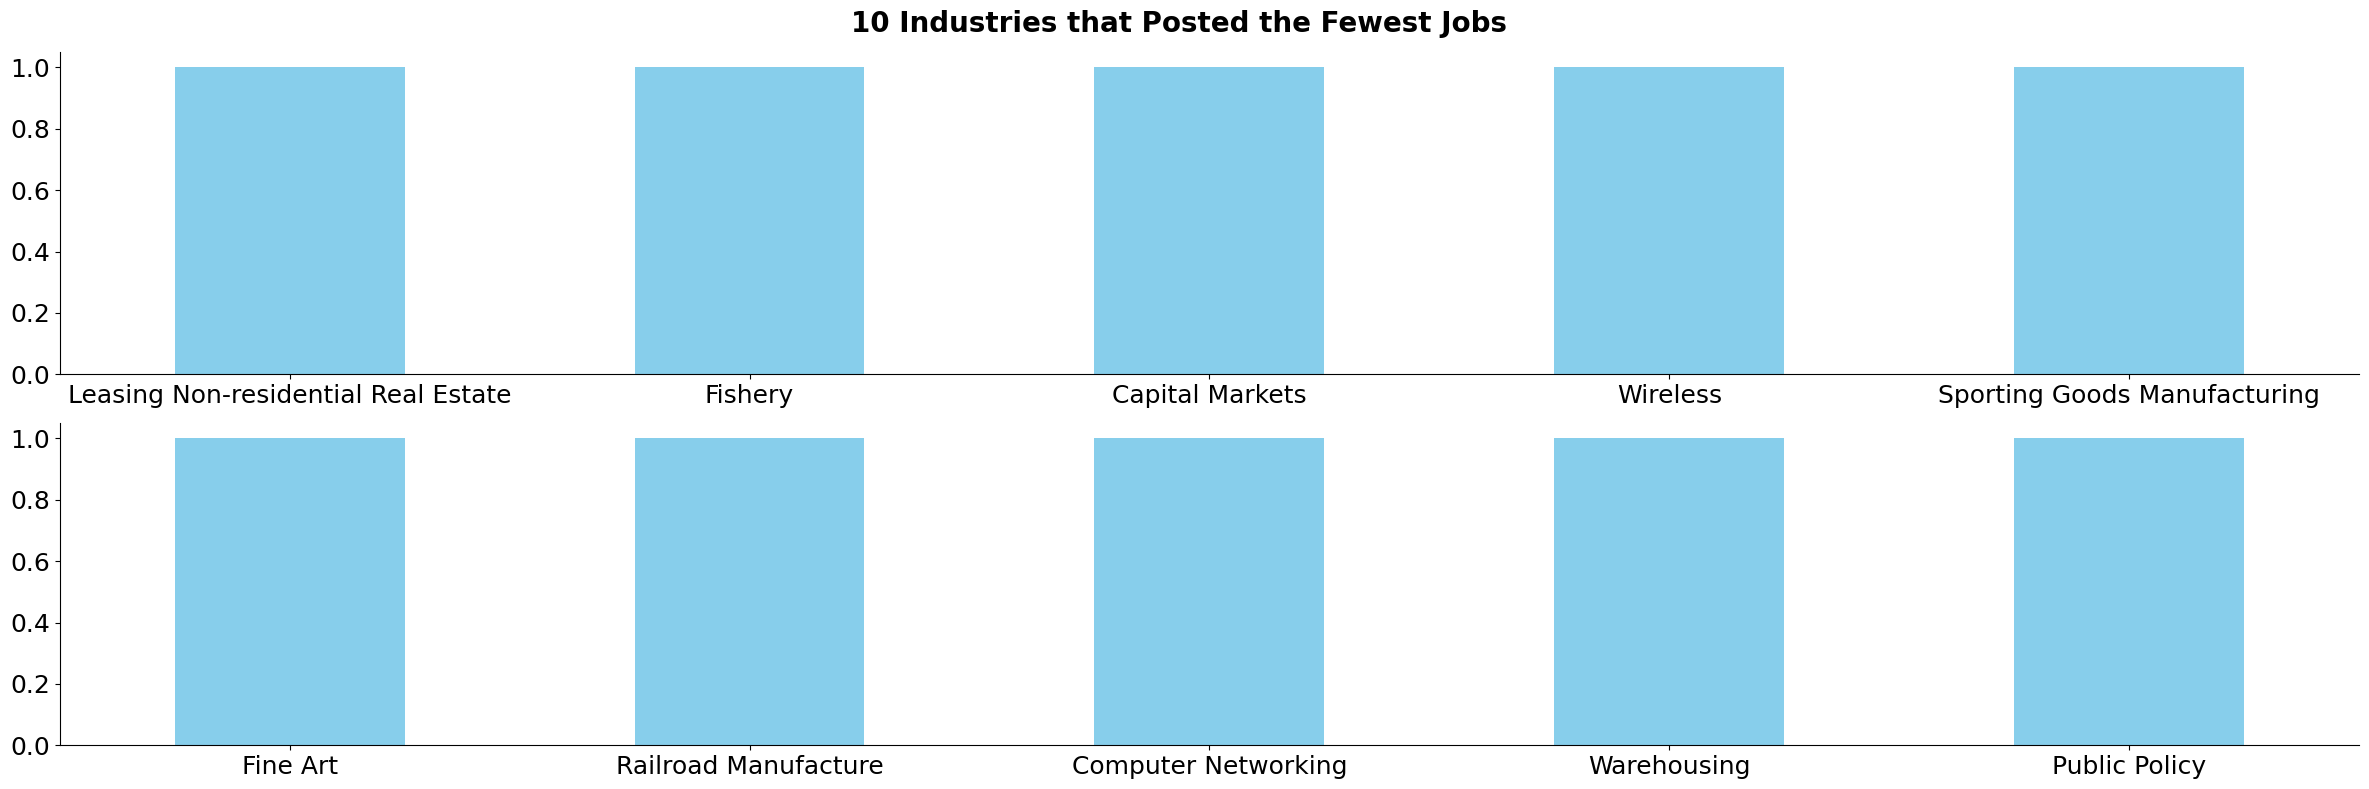

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_company_industries is your original dataframe
df = dataframes_dict['df_company_industries']

# Rename Columns
df.columns = df.columns.str.replace('_', ' ').str.title()

# Define a mapping of similar industries
industry_mapping = {
    'Dairy Product Manufacturing': 'Dairy',
    'Dairy': 'Dairy',
    'Tobacco Manufacturing': 'Tobacco',
    'Tobacco': 'Tobacco',
    'Wholesale Import and Export': 'Import & Export',
    'Import & Export': 'Import & Export',
    'Animation and Post-production': 'Animation',
    'Animation': 'Animation'
    # Add more mappings as needed
}

# Apply the mapping to create a new 'ProcessedIndustry' column
df['ProcessedIndustry'] = df['Industry'].map(industry_mapping).fillna(df['Industry'])

# Get the bottom n least common processed industries
bottom_processed = df['ProcessedIndustry'].value_counts().nsmallest(10)

# Split the processed industries into two groups (top and bottom)
processed_top = bottom_processed.iloc[:5]
processed_bottom = bottom_processed.iloc[5:]

# Increase the figure size
plt.figure(figsize=(24, 8))  # Adjust the height to accommodate both plots

# Plot the top five processed industries
plt.subplot(2, 1, 1)
bar_plot_top = processed_top.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Plot the bottom five processed industries
plt.subplot(2, 1, 2)
bar_plot_bottom = processed_bottom.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Add a single title for the entire figure with adjusted font size and bold
plt.suptitle('10 Industries that Posted the Fewest Jobs', fontsize=20, fontweight='bold')

# Adjust x-axis tick label font size
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', labelsize=18)  # You can adjust the font size as needed

# Set y-axis values font size for both charts
for ax in plt.gcf().axes:
    ax.tick_params(axis='y', labelsize=18)

# Remove chart borders
for ax in plt.gcf().axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

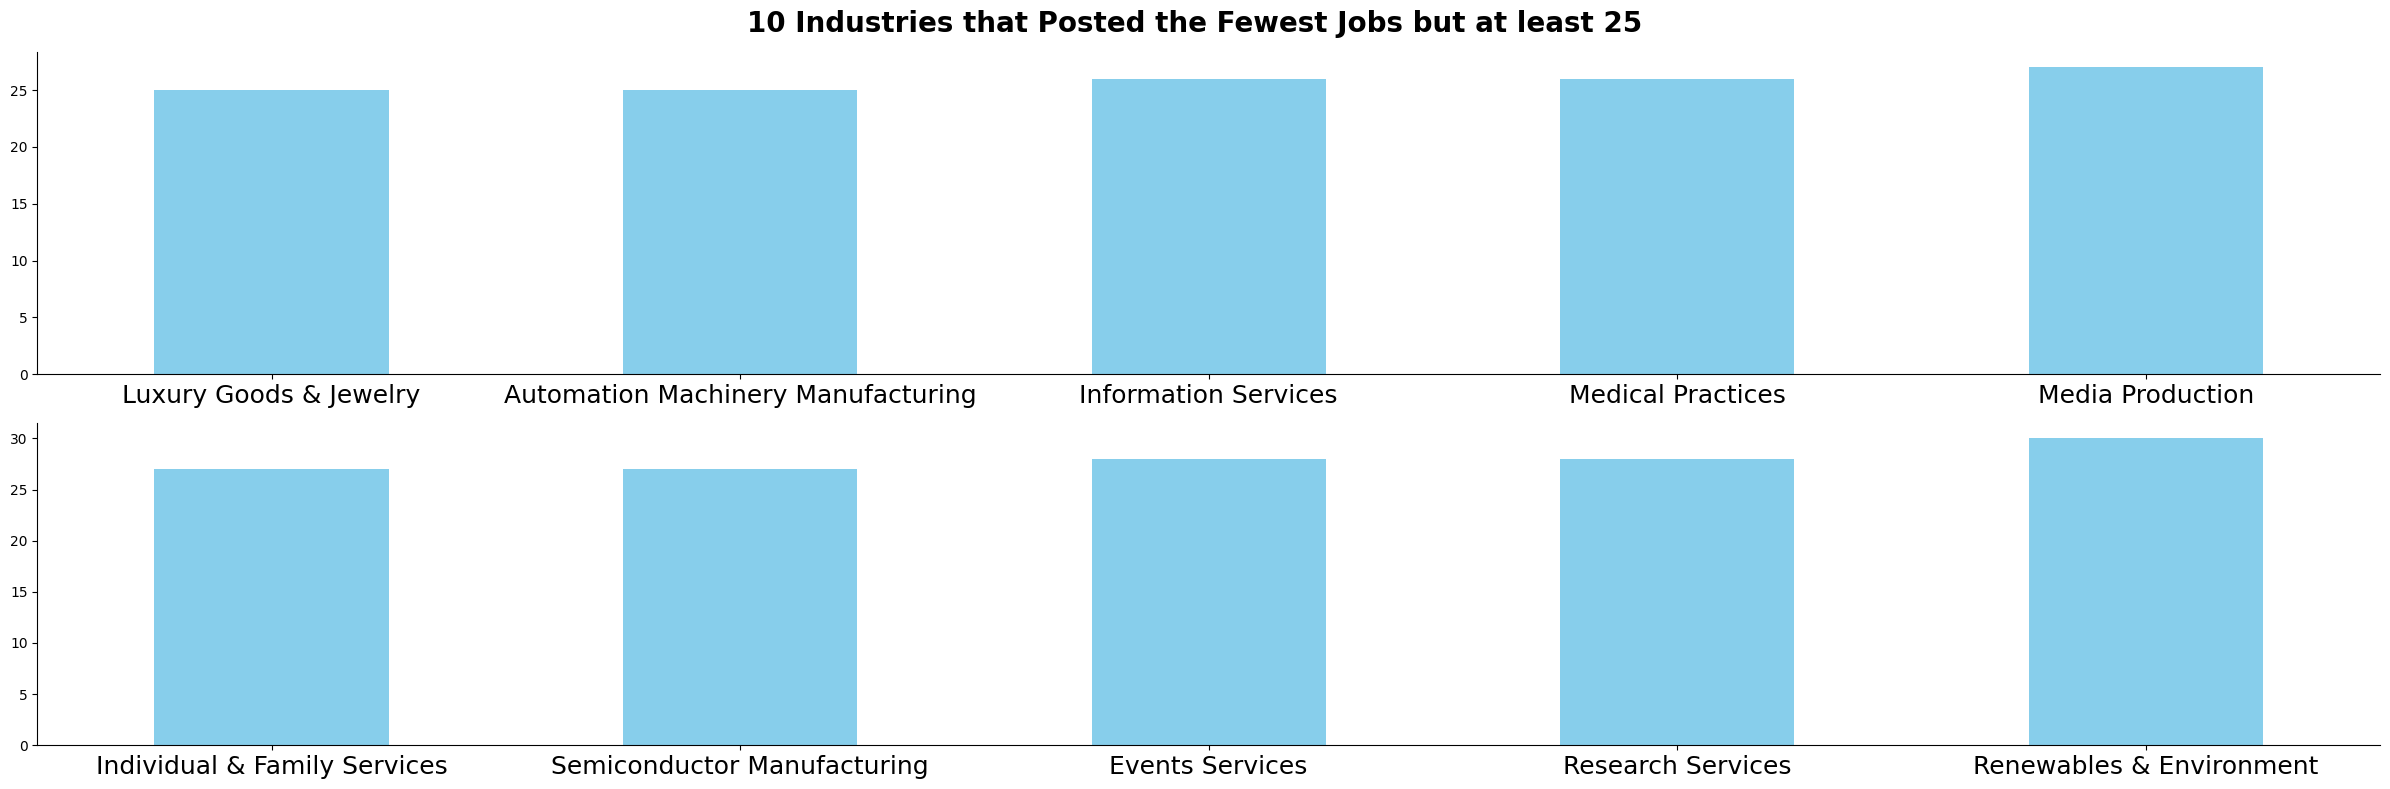

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_company_industries is your original dataframe
df = dataframes_dict['df_company_industries']

# Rename Columns
df.columns = df.columns.str.replace('_', ' ').str.title()

# Define a mapping of similar industries
industry_mapping = {
    'Dairy Product Manufacturing': 'Dairy',
    'Dairy': 'Dairy',
    'Tobacco Manufacturing': 'Tobacco',
    'Tobacco': 'Tobacco',
    'Wholesale Import and Export': 'Import & Export',
    'Import & Export': 'Import & Export',
    'Animation and Post-production': 'Animation',
    'Animation': 'Animation',
    'Architecture & Planning': 'Architecture & Planning',
    'Architecture and Planning': 'Architecture & Planning'
    # Add more mappings as needed
}

# Apply the mapping to create a new 'ProcessedIndustry' column
df['ProcessedIndustry'] = df['Industry'].map(industry_mapping).fillna(df['Industry'])

# Filter industries with minimum values at least 25
min_counts_threshold = 25
filtered_df = df.groupby('ProcessedIndustry').filter(lambda x: x['ProcessedIndustry'].count() >= min_counts_threshold)

# Get the bottom n least common processed industries
bottom_processed = filtered_df['ProcessedIndustry'].value_counts().nsmallest(10)

# Split the processed industries into two groups (top and bottom)
processed_top = bottom_processed.iloc[:5]
processed_bottom = bottom_processed.iloc[5:]

# Increase the figure size
plt.figure(figsize=(24, 8))  # Adjust the height to accommodate both plots

# Plot the top five processed industries
plt.subplot(2, 1, 1)
bar_plot_top = processed_top.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Plot the bottom five processed industries
plt.subplot(2, 1, 2)
bar_plot_bottom = processed_bottom.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Add a single title for the entire figure
plt.suptitle(f'10 Industries that Posted the Fewest Jobs but at least {min_counts_threshold}', fontsize=20, fontweight='bold')

# Adjust x-axis tick label font size
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', labelsize=18)  # You can adjust the font size as needed

# Remove chart borders
for ax in plt.gcf().axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()

### Question 4
###### Which roles are companies looking to fill most?
###### Answer: IT and Staffing Roles are most common.

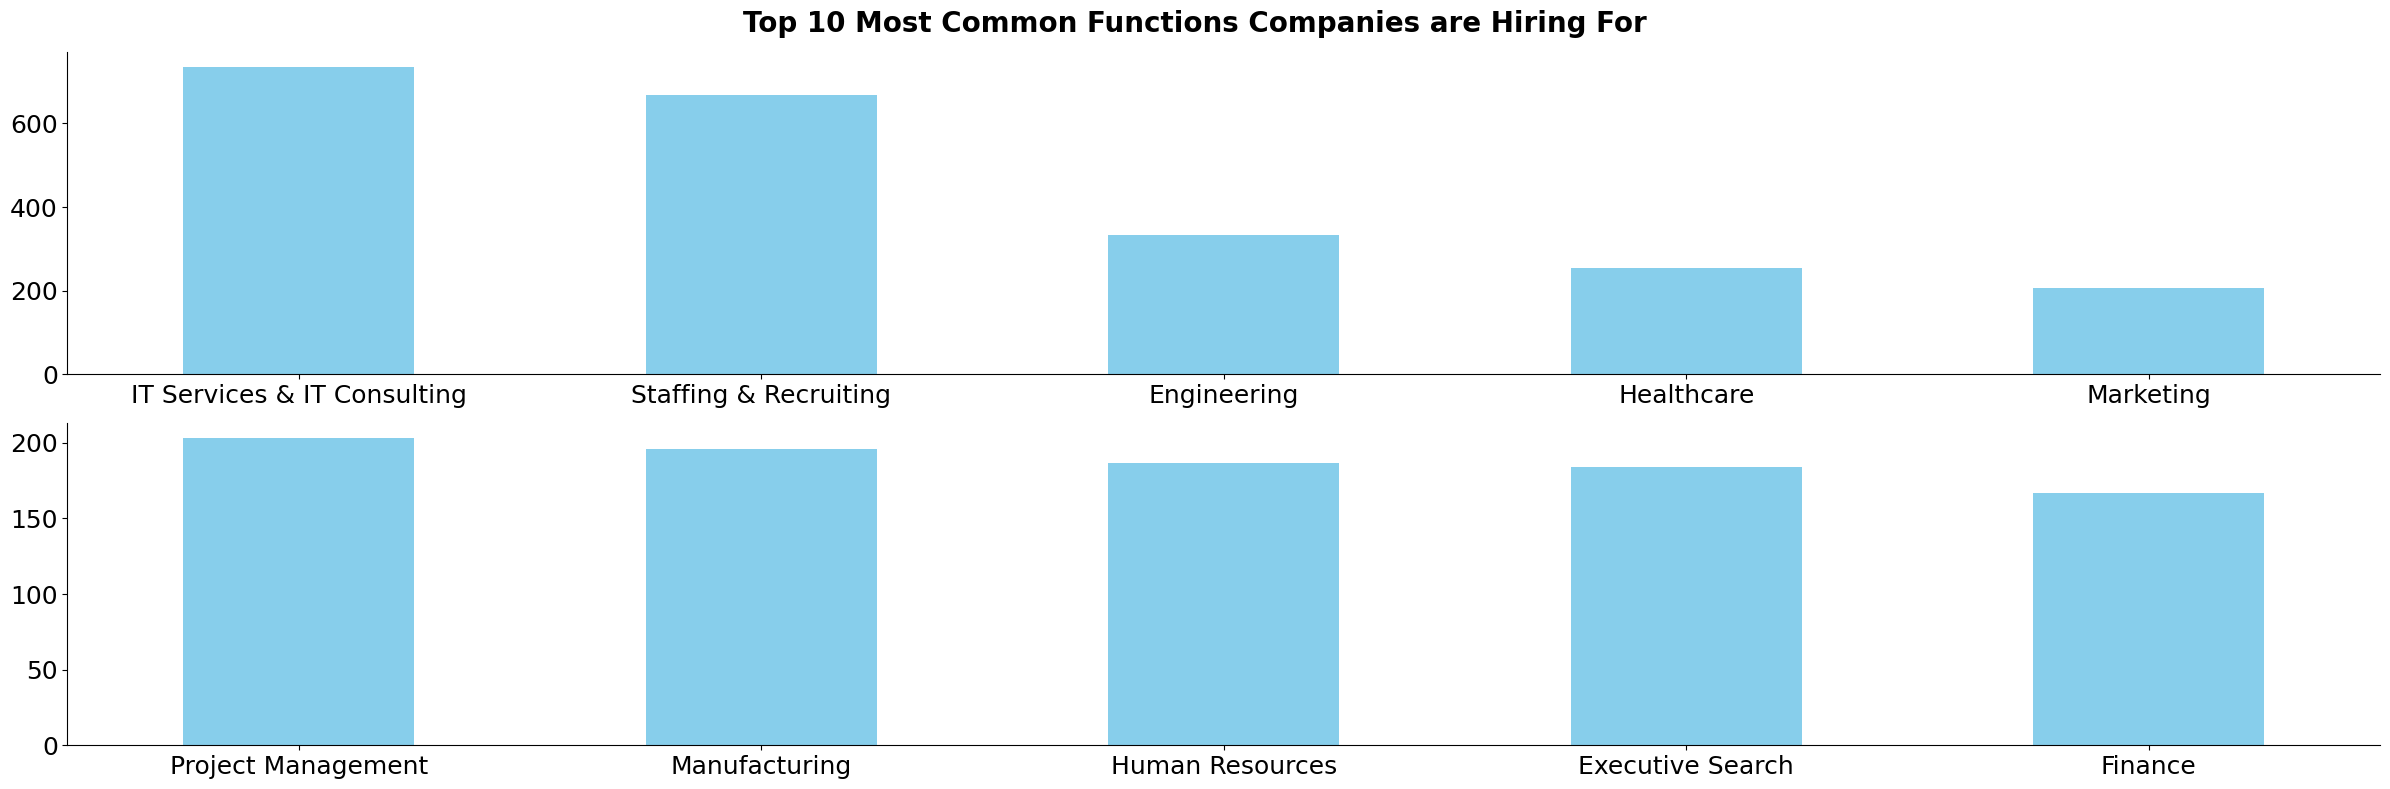

In [ ]:
import matplotlib.pyplot as plt

df = dataframes_dict['df_company_specialties']

# Rename Columns
df.columns = df.columns.str.replace('_', ' ').str.title()

# Correct for spelling
df.rename(columns={'Speciality': 'Specialty'}, inplace=True)

# Define a mapping of similar functions
function_mapping = {
    'Staffing': 'Staffing & Recruiting',
    'Recruiting': 'Staffing & Recruiting',
    'Information Technology': 'IT Services & IT Consulting',
    'Technology': 'IT Services & IT Consulting',
    'Consulting': 'IT Services & IT Consulting'
    # Add more mappings as needed
}

# Apply the mapping to create a new 'ProcessedFunction' column
df['ProcessedFunction'] = df['Specialty'].map(function_mapping).fillna(df['Specialty'])

# Get the top n most common functions
top_functions = df['ProcessedFunction'].value_counts().nlargest(10)

# Divide the top functions into two groups (top and bottom)
top_half = top_functions.iloc[:5]
bottom_half = top_functions.iloc[5:]

# Increase the figure size
plt.figure(figsize=(24, 8))  # Adjust the height to accommodate both plots

# Plot the top five functions
plt.subplot(2, 1, 1)
top_half.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Plot the bottom five functions
plt.subplot(2, 1, 2)
bottom_half.plot(kind='bar', color='skyblue', rot=0)
plt.title('')  # Remove individual subplot title

# Add a single title for the entire figure with adjusted font size and bold
plt.suptitle('Top 10 Most Common Functions Companies are Hiring For', fontsize=20, fontweight='bold')

# Rotate x-axis labels to be horizontal
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', rotation=0)

# Adjust x-axis tick label font size
for ax in plt.gcf().axes:
    ax.tick_params(axis='x', labelsize=18)  # You can adjust the font size as needed

# Set y-axis values font size for both charts
for ax in plt.gcf().axes:
    ax.tick_params(axis='y', labelsize=18)

# Remove chart borders
for ax in plt.gcf().axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.columns

Index(['salary_id', 'job_id', 'max_salary', 'med_salary', 'min_salary',
       'pay_period', 'currency', 'compensation_type'],
      dtype='object')

### Question 5
##### What is the breakdown of salaries across all job postings?
##### Answer: see box and whisker plot below
##### Note: I removed non-salary data and cleaned incorrect data (example: some yearly salaries seemed too low; I set a minimum threshold of 21620)
##### This value is based on the average number of hours worked yearly at a rate of $10

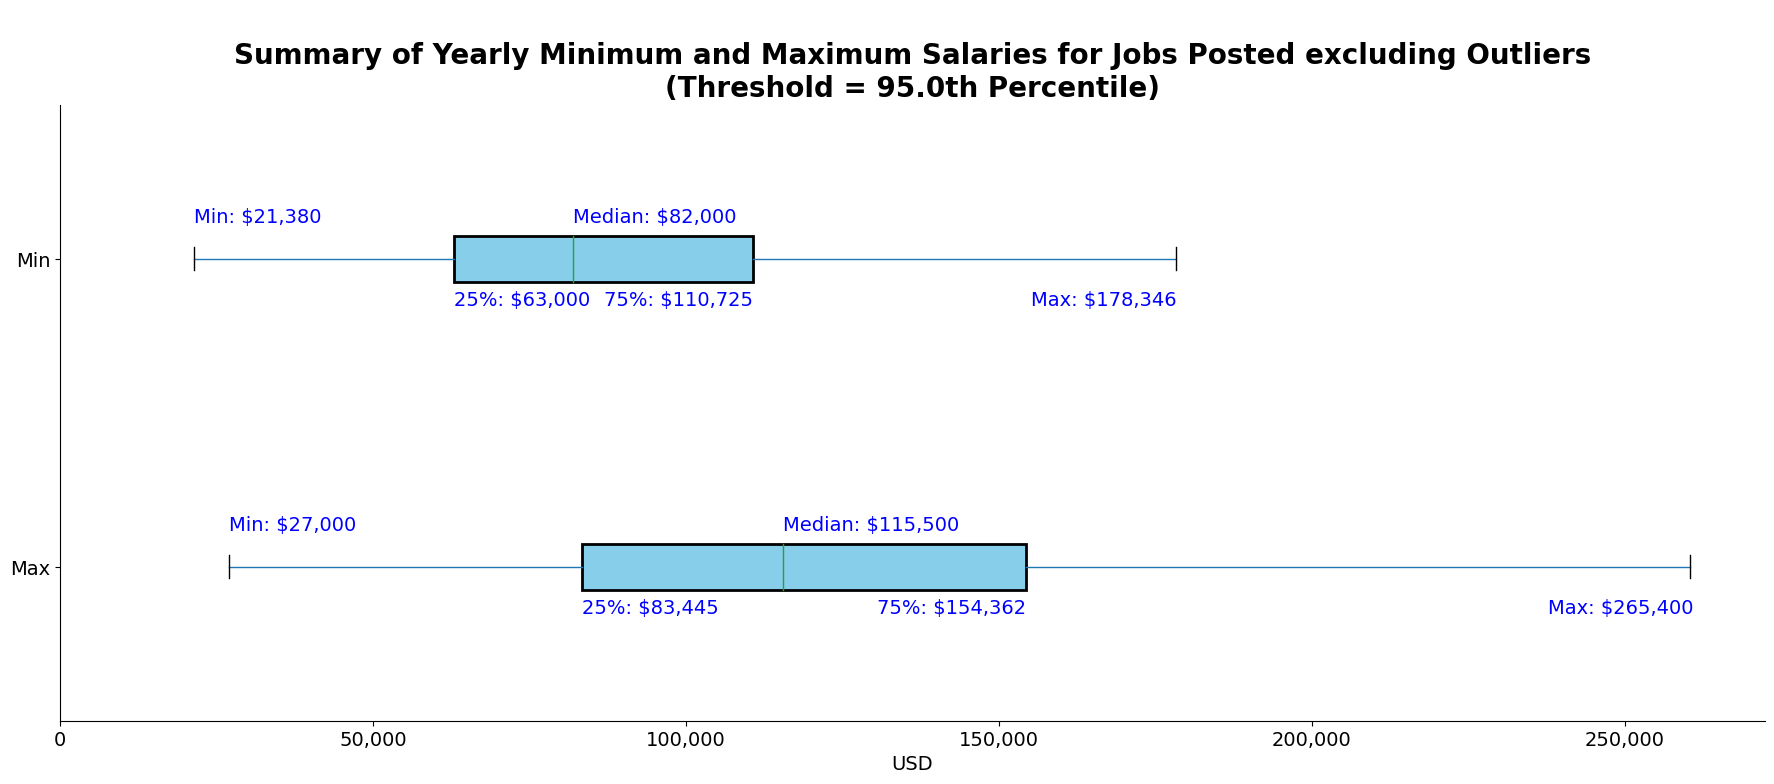

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming df_job_salaries is your original DataFrame
df = dataframes_dict['df_job_salaries']

# Clean the data: remove NaN values and filter rows with Min Salary > 20,000
df_cleaned = df.dropna(subset=['min_salary']).loc[df['min_salary'] > 20000]

# Make a copy of the DataFrame to avoid SettingWithCopyWarning
df_yearly = df_cleaned[df_cleaned['pay_period'] == 'YEARLY'].copy()

# Rename numerical columns for box and whisker plots
df_yearly.rename(columns={'max_salary': 'Max Salary', 'min_salary': 'Min Salary'}, inplace=True)

# Selecting numerical columns for box and whisker plots
numerical_cols = ['Max Salary', 'Min Salary']

# Determine the threshold dynamically (e.g., 95th percentile)
threshold_quantile = 0.95

# Set the threshold based on the specified quantile
threshold = df_yearly[numerical_cols].quantile(threshold_quantile)

# Remove outliers from selected columns
df_no_outliers = df_yearly.copy()
for col in numerical_cols:
    df_no_outliers = df_no_outliers[df_no_outliers[col] <= threshold[col]]

# Function to format ticks without decimal places
def format_ticks(x, _):
    return f'{round(x):,.0f}'

# Plotting horizontal box and whisker charts without outliers
fig, ax = plt.subplots(figsize=(22, 8))

# Specify boxprops to set color and thickness
boxprops = dict(facecolor='skyblue', linewidth=2)

# Use patch_artist=True to fill the boxes with color
boxplot = df_no_outliers[numerical_cols].boxplot(vert=False, grid=False, boxprops=boxprops, patch_artist=True, showfliers=False, ax=ax)
plt.title(f'\nSummary of Yearly Minimum and Maximum Salaries for Jobs Posted excluding Outliers\n(Threshold = {threshold_quantile * 100}th Percentile)', fontsize=20, fontweight='bold')
plt.xlabel('USD', fontsize=14)
plt.xticks(fontsize=14)  # Set x-axis tick font size
plt.xlim(0)  # Set x-axis to start at 0

# Annotate specific percentiles below each box
for col in numerical_cols:
    min_val = df_no_outliers[col].min()
    q25_val = df_no_outliers[col].quantile(0.25)
    median_val = df_no_outliers[col].median()
    q75_val = df_no_outliers[col].quantile(0.75)
    max_val = df_no_outliers[col].max()  # Corrected to use the actual maximum in the data

    # Annotate Min value
    plt.annotate(f'Min: ${round(min_val):,.0f}', xy=(min_val, numerical_cols.index(col) + 1),
                 xytext=(0, 30), textcoords='offset points', va='center', ha='left', color='blue', fontsize=14)

    # Annotate 25% value
    plt.annotate(f'25%: ${round(q25_val):,.0f}', xy=(q25_val, numerical_cols.index(col) + 1),
                 xytext=(0, -30), textcoords='offset points', va='center', ha='left', color='blue', fontsize=14)

    # Annotate Median value
    plt.annotate(f'Median: ${round(median_val):,.0f}', xy=(median_val, numerical_cols.index(col) + 1),
                 xytext=(0, 30), textcoords='offset points', va='center', ha='left', color='blue', fontsize=14)

    # Annotate 75% value
    plt.annotate(f'75%: ${round(q75_val):,.0f}', xy=(q75_val, numerical_cols.index(col) + 1),
                 xytext=(0, -30), textcoords='offset points', va='center', ha='right', color='blue', fontsize=14)

    # Annotate Max value (right-adjusted within IQR)
    max_within_iqr = min(max_val, q75_val + 1.5 * (q75_val - q25_val))
    max_text_position = max_within_iqr + (max_val - max_within_iqr) * 0.05  # Adjusted position to the right
    plt.annotate(f'Max: ${round(max_val):,.0f}', xy=(max_text_position, numerical_cols.index(col) + 1),
                 xytext=(0, -30), textcoords='offset points', va='center', ha='right', color='blue', fontsize=14)

# Set y-axis ticks and labels with adjusted font size
plt.yticks([1, 2], ['Max', 'Min'], fontsize=14)

# Format x-axis labels with comma as thousand separators
ax.xaxis.set_major_formatter(FuncFormatter(format_ticks))

# Remove chart borders except axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

plt.show()
